## Libraries

In [83]:
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import numpy as np
import itertools
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## Importing Dataset

In [84]:
try:
    dataset = pd.read_csv('Dataset/customers_data.csv')
    dataset.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("O dataset possui {} amostras com cada um {} features.".format(*dataset.shape))
except FileNotFoundError:
    print('Dataset NÃO encontrado')

O dataset possui 440 amostras com cada um 6 features.


**Dataset Description**
    - FRESH: annual spending (m.u.) on fresh products (Continuous); 
    - MILK: annual spending (m.u.) on milk products (Continuous); 
    - GROCERY: annual spending (m.u.)on grocery products (Continuous); 
    - FROZEN: annual spending (m.u.)on frozen products (Continuous) 
    - DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
    - DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
    - CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 
    - REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 

## Data Exploration

In [85]:
dataset.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


- Question 1

Escolha 3 amostras diferentes (que façam parte de diferentes *quartis*), e tente descobrir que tipo de estabelecimento cada uma as amostras represeta? Exemplo: mercados, bares, varejistas e etc

In [86]:
dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [87]:
fresh_q3 = 16933.75
dataset.loc[(dataset['Fresh'] > 16933.75)].tail()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
424,16980,2884,12232,874,3213,249
427,31012,16687,5429,15082,439,1163
432,21117,1162,4754,269,1328,395
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346


In [88]:
grocery_q3 = 10655.75
dataset.loc[(dataset['Grocery'] > grocery_q3)].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
9,6006,11093,18881,1159,7425,2098
10,3366,5403,12974,4400,5977,1744
12,31714,12319,11757,287,3881,2931
13,21217,6208,14982,3095,6707,602
14,24653,9465,12091,294,5058,2168


In [89]:
frozen_q3 = 3554.25
detergens_papers_q1 = 256.75
dataset.loc[(dataset['Frozen'] > frozen_q3) & (dataset['Detergents_Paper'] < detergens_papers_q1)].tail()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
400,4446,906,1238,3576,153,1014
401,27167,2801,2128,13223,92,1902
425,11243,2408,2593,15348,108,1886
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346


Amostras escolhidas:
1. index_1 = 436:
    - Alto "Fresh": mercearia especializada em alimentos frescos.
2. index_2 = 9:
    - Tudo Alto: poderia ser um supermercado no qual disponibiliza um pouco de tudo    
3. index_3 = 435:
    - Alto em "Frozen", "Milk", "Grocery", "Frozen" e "Delicasse": poderia ser um restaurante com baixo uso de congelados

**Feature Relevance**

- Question 2:

Será que todas as 6 features são relevantes para entender a compra do cliente? É possível determinar se os clientes que compraram o produto A irão comprar o produto B?

Essa análise pode ser feita fazendo um modelode regressão supervisionado com uma feauture removida, ou seja, fazer a predição da feature removida (*dependent variable*) utilizando as demais como regressores (*independent variables*)

In [90]:
dependent_variables = dataset.columns

In [91]:
def predict_variable(dataset, dependent_variable, model=None):
    
    X = dataset.drop([dependent_variable], axis=1)
    y = dataset[dependent_variable]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    if not model:
        linear_model = LinearRegression()
        linear_model.fit(X_train, y_train)
        score = linear_model.score(X_test, y_test)
        print(f'R2 score for {dependent_variable} as dependent_variable: {score:.4}')
    else:
        dtr = DecisionTreeRegressor(random_state=42)
        dtr.fit(X_train, y_train)
        score = dtr.score(X_test, y_test)
        print(f'R2 score for {dependent_variable} as dependent_variable: {score:.4}')

In [92]:
for dependent_variable in dataset.columns:
    predict_variable(dataset, dependent_variable, model='Tree')

R2 score for Fresh as dependent_variable: -0.3857
R2 score for Milk as dependent_variable: 0.1563
R2 score for Grocery as dependent_variable: 0.6819
R2 score for Frozen as dependent_variable: -0.2101
R2 score for Detergents_Paper as dependent_variable: 0.2717
R2 score for Delicassen as dependent_variable: -2.255


*LinearRegression*: <br>
    Delicassen foi o que obteve um R2 negativo, o que pode indicar que o mesmo seja necessário para identificar os padrões de compra do usuário
    Fresh e Frozen foram o que obtiveram os seguintes piores R2
    Milk e Detergents_Papers foram os que obtiveram um dos melhores R2, porém se encotram na mesma faixa
    Grocery foi o que obteve o maior R2, pode dizer que o seu uso não traga mais informações do que com as demais features, porém ainda é cedo para se dizer
    
*Decision Tree*: <br>
    Grocey foi o que obteve o melhor R2, qnd comparado com os demais, reforçando a suposição feita acima. Vamos fazer novos testes mais para frente.

**Feature Distribution**

Durante a etapa anterior foi possível obter informações se uma determinada feature é relavante para identificar um cliente relevante ou não. Para que essa afirmação seja reforçada é necessário analizar se essa mesma feature tem ou não uma correlação com as demais; em caso afirmativo, se reforça a afirmação, caso contrário, não.

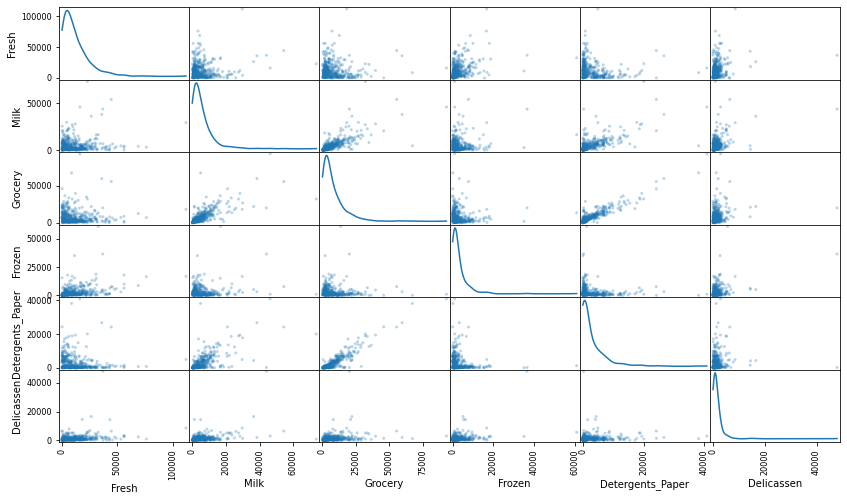

In [93]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(dataset, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

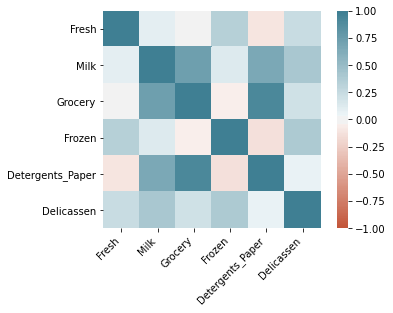

In [94]:
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- Question 3 <br>
Existem pares de características que exibem algum grau de correlação?
Isso confirma ou nega suas suspeitas sobre a relevância do recurso que você tentou prever?
Como os dados para esses recursos são distribuídos?
Dica: os dados são distribuídos normalmente? Onde está a maioria dos pontos de dados?



Alta correlação:
    - Grocery com Milk
    - Detergents_paper com Grocery
    - Detergents_paper com Milk
    
Essas correlação reforça o resultado obtido quando Grocery foi *regredido* com as demais variáveis

Os dados não Normalmente Distribuídos devido a presença de *outliers*

## Data Preprocessing

Como visto anteriormente os dados não são Normalmente Distribuídos, será necessário normalizados já que
os algoritmos de clusterização exigem que sigam uma distribuiição Normal.
Uma das técnicas mais simples para normalizar o dado seria aplicar o *log*

In [95]:
log_dataset = np.log(dataset)

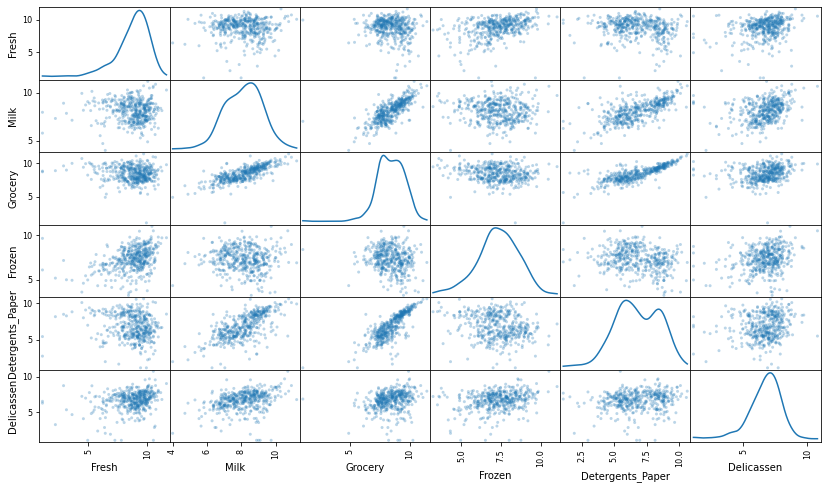

In [96]:
# Checando se as distribuições entre as features se mantiveram depois da aplicação do log
pd.plotting.scatter_matrix(log_dataset, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

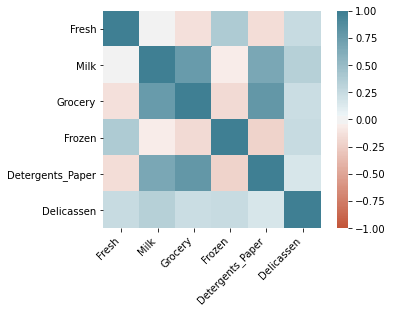

In [97]:
corr = log_dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- Outlier Detection

Um dos métodos para se detectar Outliers é utilizando o [Tukey's Method for identfying outlier](https://datatest.readthedocs.io/en/stable/how-to/outliers.html)

In [98]:
def detect_outlier_per_feature(dataset, column):
    # First Quartile
    Q1 = np.percentile(dataset.loc[:, column], 25)
    
    # Third Quartile
    Q3 = np.percentile(dataset.loc[:, column], 75)
    step = 1.5 * (Q3 - Q1)
    
    outliers_index = dataset.loc[~((dataset[column] >= Q1 - step) & (dataset[column] <= Q3 + step)), :].index
    return outliers_index

In [99]:
outliers_list = []

for feature in log_dataset.columns:
    feature_outliers = detect_outlier_per_feature(log_dataset, feature)
    outliers_list.append(feature_outliers)

In [100]:
outliers = list(itertools.chain.from_iterable(outliers_list))

In [101]:
unique_outliers = set(outliers)

Existem 5 amostras que são consideradas outliers por mais de uma feature:

In [102]:
# List of duplicate outliers
dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

In [103]:
dup_outliers

[128, 65, 66, 75, 154]

Eles devem ser removidos, pois não são apenas discrepantes em uma categoria, mas mais de uma vez.

In [104]:
# Remove Duplicate Outliers

good_data = log_dataset.drop(log_dataset.index[dup_outliers]).reset_index(drop = True)

In [105]:
good_data.shape

(435, 6)

## Feature Transformation

Com os outliers removidos e normalmente distribuídos é possível aplicar PCA a fim de descobrir quais dimensões sobre os dados melhores maximizam as variância das features envolvidas.

In [106]:
pca = PCA(n_components=len(good_data.columns))

In [107]:
pca.fit(good_data)

PCA(n_components=6)

In [108]:
pca.explained_variance_ratio_

array([0.44302505, 0.26379218, 0.1230638 , 0.10120908, 0.04850196,
       0.02040793])

In [109]:
pca.components_

array([[ 0.16746374, -0.40143866, -0.43811142,  0.17820975, -0.75142613,
        -0.14987105],
       [-0.68593522, -0.16722783, -0.07072902, -0.50054207, -0.04244398,
        -0.49414702],
       [-0.67738927,  0.04020501, -0.01953317,  0.31504299, -0.21170161,
         0.62855082],
       [-0.204293  ,  0.01281068,  0.05567564,  0.78544905,  0.20961368,
        -0.54233972],
       [-0.00261356,  0.71923846,  0.3553861 , -0.0330861 , -0.55815441,
        -0.20918629],
       [ 0.02915623, -0.54018269,  0.82053348,  0.02054106, -0.18238824,
         0.01974794]])

In [110]:
pd_variance = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance Ratio'])
pd_components = pd.DataFrame(pca.components_, columns=good_data.columns)
pd.concat([pd_variance, pd_components], axis=1)

,Explained Variance Ratio,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.443025,0.167464,-0.401439,-0.438111,0.178210,-0.751426,-0.149871
1,0.263792,-0.685935,-0.167228,-0.070729,-0.500542,-0.042444,-0.494147
2,0.123064,-0.677389,0.040205,-0.019533,0.315043,-0.211702,0.628551
3,0.101209,-0.204293,0.012811,0.055676,0.785449,0.209614,-0.542340
4,0.048502,-0.002614,0.719238,0.355386,-0.033086,-0.558154,-0.209186
5,0.020408,0.029156,-0.540183,0.820533,0.020541,-0.182388,0.019748


- Question 5: 
<br> Qual porcentagem da variância total dos dados é explicada pelas duas primeiras componentes? E pelas 4? Análise o quanto cada uma das features influencia em cada umas das componentes

- 70.68% da variancia é explicada pela primeira e pela segunda componentes; 93.11% pelos 4 primeiras

- PC 1: As features 'Milk', 'Grocery' e 'Detergents_Papers' são as que mais inflenciam esta primeira componente. Essas 3 features estão bastante correlacionadas

- PC 2: 'Fresh', 'Delicassen' e Frozen são as que mais influenciam essa componente

- PC 3: 'Delicatessen' e 'Fresh'

- PC 4: 'Frozen' e 'Delicatessen'

**Dimesionality Reduction**

Observando a variancia total explicada por cada uma das componentes, vamos escolher o total de duas para começar: 70.68% da variância total

In [111]:
pca = PCA(n_components=2)
pca.fit(good_data)

reduced_data = pca.transform(good_data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

## Clusters

Dependendo do problema, o número de clusters que você espera que haja nos dados pode já ser conhecido. Quando o número de clusters não é conhecido a priori, não há garantia de que um determinado número de clusters melhor segmente os dados, uma vez que não está claro qual estrutura existe nos dados - se houver. No entanto, podemos quantificar a "bondade" de um agrupamento calculando o coeficiente de silhueta de cada ponto de dados. **O coeficiente de silhueta para um ponto de dados mede o quão semelhante ele é ao seu cluster atribuído de -1 (diferente) a 1 (semelhante)**. O cálculo do coeficiente de silhueta médio fornece um método de pontuação simples de um determinado agrupamento. 

[silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

In [112]:
n_clusters=2

In [113]:
def compute_cluster(dataset, n_cluster):
    clusterer = KMeans(n_clusters=n_cluster).fit(dataset)

    preds = clusterer.predict(dataset)

    centers = clusterer.cluster_centers_

    score = silhouette_score(dataset, preds, metric='euclidean')
    print(f'Para n_clusters = {n_cluster}. A média da silhouette_score é: {score}')

In [114]:
for cluster in range(2, 20):
    compute_cluster(reduced_data, cluster)

Para n_clusters = 2. A média da silhouette_score é: 0.42628101546910835
Para n_clusters = 3. A média da silhouette_score é: 0.3971382088445873
Para n_clusters = 4. A média da silhouette_score é: 0.3322215068633012
Para n_clusters = 5. A média da silhouette_score é: 0.3466774503706678
Para n_clusters = 6. A média da silhouette_score é: 0.3684596733566316
Para n_clusters = 7. A média da silhouette_score é: 0.3651515355283027
Para n_clusters = 8. A média da silhouette_score é: 0.35412820544578144
Para n_clusters = 9. A média da silhouette_score é: 0.3591864581572697
Para n_clusters = 10. A média da silhouette_score é: 0.3676769070012845
Para n_clusters = 11. A média da silhouette_score é: 0.36001950471748506
Para n_clusters = 12. A média da silhouette_score é: 0.3621165147966168
Para n_clusters = 13. A média da silhouette_score é: 0.3653235546138161
Para n_clusters = 14. A média da silhouette_score é: 0.3358927052194736
Para n_clusters = 15. A média da silhouette_score é: 0.35311508472698

O melhor score obtido foi com n_cluster = 2

**Cluster Visualization**

In [115]:
clusterer = KMeans(n_clusters=2).fit(reduced_data)

preds = clusterer.predict(reduced_data)

centers = clusterer.cluster_centers_

In [116]:
predictions = pd.DataFrame(preds, columns = ['Cluster'])


In [117]:
plot_data = pd.concat([predictions, reduced_data], axis = 1)

<Figure size 432x288 with 0 Axes>

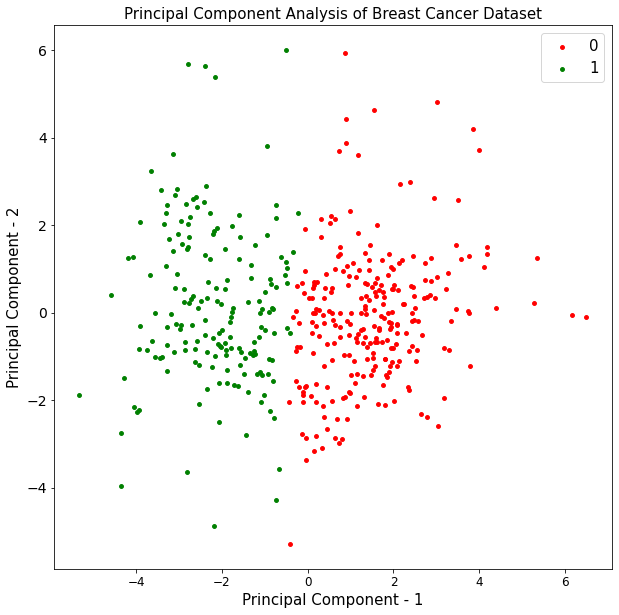

In [118]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=15)
plt.ylabel('Principal Component - 2',fontsize=15)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=15)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = predictions['Cluster'] == target
    plt.scatter(reduced_data.loc[indicesToKeep, 'Dimension 1']
               , reduced_data.loc[indicesToKeep, 'Dimension 2'], c = color, s = 15)

plt.legend(targets,prop={'size': 15})

Cada cluster presente na visualização acima possui um ponto central. Esses centros (ou meios) não são especificamente pontos de dados dos dados, mas sim as médias de todos os pontos de dados previstos nos respectivos clusters. Para o problema de criação de segmentos de clientes, o ponto central de um cluster corresponde ao cliente médio desse segmento. Como os dados estão atualmente reduzidos em dimensão e escalados por um logaritmo, podemos recuperar os gastos do cliente representativo desses pontos de dados aplicando as transformações inversas.

In [119]:
log_centers = pca.inverse_transform(centers)

true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = dataset.columns)
true_centers.index = segments

In [120]:
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


Estaremos usando desvios da mediana, com referência à descrição estatística do conjunto de dados no início deste projeto, uma vez que a média é sensível a outliers e não produziria comparações significativas

In [122]:
true_centers - dataset.median()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,363.0,-1730.0,-2278.5,562.0,-522.5,-284.5
Segment 1,-4499.0,4273.0,7348.5,-574.0,3744.5,70.5


Segment 0: 
    - Acima da mediana em Fresh e Frozen: Podendo representar mercados de frutos do mar e/ou carne
Segment 1:
    - Acima da mediana em Milk, Grocery e Detergents_Papers: Representando restaurantes e Cafés